# Using APIs: Open Australia

OpenAustralia is a charity run by the OpenAustralia Foundation to help the public keep tabs on their political representatives. Learn more about them by going to: https://www.openaustralia.org.au

In this notebook, we will obtain the record of parliamentary debates (Hansard) accessed via OpenAustralia with an API (application programming interface). The mechanisms that allow us to retrieve data in this fashion are the same as those that means a website can be get information to render, which are via HTTP requests. 

<div class="alert alert-block alert-success">
<b>Skills:</b> 
    
- Retrieving text from a hosted site
- APIs, specifically a REST API using GET
- Word frequency counts
- A simple visual representation of data
- Normalisation (lemmatisation)
    
<b>Skill Level:</b> Beginner/Intermediate
</div>

<b>NOTE:</b> You may want to learn how to save the downloaded text into the LDaCa repository with this follow-up notebook: https://github.com/Australian-Text-Analytics-Platform/create-rocrate  

In [1]:
# Before we begin, let's make sure that we install all the requirements that we need
import sys
!{sys.executable} -m pip install -r requirements.txt

  Using cached en_core_web_sm-3.0.0-py3-none-any.whl


<div class="alert alert-block alert-warning">
<b>Installing Libraries</b> 

The requirements file <b>requirements.txt</b> is included with this notebook. Take a look inside to find out what libraries you have just installed with the above command.

</div>

## Apply for an API Key


To gain access to the data you will need to apply an API key. To get one, you can follow the instruction on this website: https://www.openaustralia.org.au/api/

<div class="alert alert-block alert-info">
<b>Tools:</b> 

In this notebook we'll be learning how to use the library 'requests'

Learn more about the library here: https://docs.python-requests.org/
    
It is also assumed that you have some familiarity with dataframes, eg. pandas. If you do not, don't worry, you will still be able to run the notebook.

</div>

In [2]:
# Import the required libraries
import requests
import pandas as pd

<div class="alert alert-block alert-danger">
<b>You Need an API Key to Run this Notebook</b> 

In general, you will need to apply for an api key to use an api. The format of the OpenAustralia api key is a string (eg 'RPLDbrHE9cPoEn2MIfQWfRcA') that you will need to paste below as the value for API_KEY.
</div>

In [3]:
# Define constants at the very beginning
OA_API = 'http://www.openaustralia.org/api/'
API_KEY = None  # add your key here as a string, eg 'RPLDbrHE9cPoEn2MIfQWfRcA' (with the quotes)
OUTPUT_FORMAT = 'js'

if API_KEY is None:
    API_KEY = open('oak.txt', 'r').read().strip()

<div class="alert alert-block alert-warning">
<b>Why Store Constants?</b> 

The endpoint we use won't change throughout the notebook once we've defined it, but at some point you may want to reuse this notebook. Having a handle for the api or your api key means that the reuse of this notebook or the code within it won't have to change that much. <b>This is just some good coding hygiene</b>; there is only one place where you need to change a value without any worry.

</div>

### Function: getRepresentatives

Each member of parliament has a unique id and we can obtain this unique id by using the function 'getRepresentatives'. We can learn about this function in the website below.

    https://www.openaustralia.org.au/api/docs/getRepresentatives
    
As you can see in the description, all arguments to this function are optional. This function will simply return all members of Parliament and it will be up to us to process the data to find the unique id for the politicians we are interested in.

Even though it is stated that all argument are optional, it is implicit that the api_key will is required as a parameter to the function.

In [4]:
# Define a dictionary of parameters as arguments to the function
params = dict()
params['key'] = API_KEY
params['output'] = OUTPUT_FORMAT

# The function we are using is 'getRepresentatives' so we can fetch the politician's member_id
my_function = 'getRepresentatives'

## RESTful API: GET

A 'get' request is a method to retrieve data without modifying the originating resource in any way.

The library 'requests' in Python has a function 'get', which requires as the first argument the 'endpoint' (or url to retrieve the data) followed by other parameters such as your api key.

In [5]:
# The full endpoint is the string: OA_API+my_function. In Python you can concatenate strings with '+' 
response = requests.get(OA_API+my_function, params=params)
result = response.json()

print('NUMBER OF PARLIAMENTARIANS:', len(result))

# Create variables to store the info from each politician of interest
bandt = dict()
allen = dict()

# Loop through the results to find the relevant information
for senator in result:
    if senator['last_name'] == 'Bandt':
        print('INFO ON BANDT:')
        print(senator)
        bandt = senator
    if senator['last_name'] == 'Allen':
        print('INFO ON ALLEN:')
        print(senator)
        allen = senator

NUMBER OF PARLIAMENTARIANS: 151
INFO ON BANDT:
{'member_id': '600', 'house': '1', 'first_name': 'Adam', 'last_name': 'Bandt', 'constituency': 'Melbourne', 'party': 'Australian Greens', 'entered_house': '2010-08-21', 'left_house': '9999-12-31', 'entered_reason': 'general_election', 'left_reason': 'still_in_office', 'person_id': '10734', 'title': '', 'lastupdate': '2010-09-27 00:57:22', 'full_name': 'Adam Bandt', 'name': 'Adam Bandt', 'image': '/images/mpsL/10734.jpg'}
INFO ON ALLEN:
{'member_id': '750', 'house': '1', 'first_name': 'Katie', 'last_name': 'Allen', 'constituency': 'Higgins', 'party': 'Liberal Party', 'entered_house': '2019-05-18', 'left_house': '9999-12-31', 'entered_reason': 'general_election', 'left_reason': 'still_in_office', 'person_id': '10928', 'title': '', 'lastupdate': '2019-07-03 07:07:03', 'full_name': 'Katie Allen', 'name': 'Katie Allen', 'image': '/images/mpsL/10928.jpg'}


### Function: getHansard

Now that we have the member_ids for Adam Bandt and Katie Allen, we can retrieve their debates using the getHansard function. 

Learn more about this function here:

    https://www.openaustralia.org.au/api/docs/getHansard

In [6]:
my_function = 'getHansard'
my_params = params        # require the old params, such as the api_key and the output type
my_params['order'] = 'd'  # d for date; r for relevance; p for person


# Allen
my_params['person'] = allen['person_id']
response = requests.get(OA_API+my_function, params=my_params)
hansard_allen = response.json()

# Bandt
my_params['person'] = bandt['person_id']
response = requests.get(OA_API+my_function, params=my_params)
hansard_bandt = response.json()

<div class="alert alert-block alert-warning">
<b>Inspect Your Output</b> 

It's always a good idea to inspect your output by printing it to screen, especially if your data is provided by some other third party. This lets you become familiar with the kind of information that's there and it's a good way to see if you've made a mistake somewhere in your code, particularly if you get unexpected results.

</div>

In [7]:
# Print the data on Adam Bandt
hansard_bandt

{'info': {'s': 'speaker:10734',
  'results_per_page': 20,
  'page': 1,
  'total_results': 1277,
  'first_result': 1},
 'searchdescription': 'by Adam Bandt',
 'rows': [{'gid': '2021-10-27.125.1',
   'hdate': '2021-10-27',
   'htype': '12',
   'major': '1',
   'section_id': '780809',
   'subsection_id': '780810',
   'relevance': 28,
   'speaker_id': '600',
   'hpos': '268',
   'body': "Finally, after eight years, a piece of legislation that might actually do something good for renewables. Why did it take eight years? Could it be because the energy minister, who's in charge of this legislation&#8212;but doesn't have the courage to come and sit here at the dispatch box, so he leaves it up to his junior to come in to fly the flag&#8212;earned his political stripes campaigning...",
   'listurl': '/debates/?id=2021-10-27.116.2&amp;s=speaker%3A10734#g125.1',
   'speaker': {'member_id': '600',
    'title': '',
    'first_name': 'Adam',
    'last_name': 'Bandt',
    'house': '1',
    'constituen

In [8]:
# Print the data on Katie Allen
hansard_allen

{'info': {'s': 'speaker:10928',
  'results_per_page': 20,
  'page': 1,
  'total_results': 364,
  'first_result': 1},
 'searchdescription': 'by Katie Allen',
 'rows': [{'gid': '2021-10-28.67.2',
   'hdate': '2021-10-28',
   'htype': '12',
   'major': '1',
   'section_id': '781003',
   'subsection_id': '781026',
   'relevance': 87,
   'speaker_id': '750',
   'hpos': '142',
   'body': "This week the Prime Minister set out our plan for a net zero future. I'm immensely proud of this momentous occasion in Australia's history. Australia has agreed to achieve net zero emissions by 2050. This will have a whole-of-economy impact. Our plan is based on five clear principles. The first is technology; by grasping these opportunities and predicted market trends, we will shape our...",
   'listurl': '/debates/?id=2021-10-28.67.1&amp;s=speaker%3A10928#g67.2',
   'speaker': {'member_id': '750',
    'title': '',
    'first_name': 'Katie',
    'last_name': 'Allen',
    'house': '1',
    'constituency': 'H

In [9]:
# Print the keys
hansard_allen.keys()
hansard_bandt.keys()

dict_keys(['info', 'searchdescription', 'rows'])

In [10]:
# Print the rows
hansard_bandt['rows']

[{'gid': '2021-10-27.125.1',
  'hdate': '2021-10-27',
  'htype': '12',
  'major': '1',
  'section_id': '780809',
  'subsection_id': '780810',
  'relevance': 28,
  'speaker_id': '600',
  'hpos': '268',
  'body': "Finally, after eight years, a piece of legislation that might actually do something good for renewables. Why did it take eight years? Could it be because the energy minister, who's in charge of this legislation&#8212;but doesn't have the courage to come and sit here at the dispatch box, so he leaves it up to his junior to come in to fly the flag&#8212;earned his political stripes campaigning...",
  'listurl': '/debates/?id=2021-10-27.116.2&amp;s=speaker%3A10734#g125.1',
  'speaker': {'member_id': '600',
   'title': '',
   'first_name': 'Adam',
   'last_name': 'Bandt',
   'house': '1',
   'constituency': 'Melbourne',
   'party': 'Australian Greens',
   'person_id': '10734',
   'url': '/mp/?m=600'},
  'parent': {'body': 'Bills: Offshore Electricity Infrastructure Bill 2021, Offsh

<div class="alert alert-block alert-warning">
<b>List Comprehension</b> 

List comprehension is a more compact way of iterating over a sequence of items to create a new list. This mechanism is used to create more readable concise code, which can replace lengthly for-loops.

Learn more about it here: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions

</div>

In [11]:
# Save the snippets of the debates in appropriately named variables using list comprehension
bandt_snippets = [snippet['body'].replace('&#8212', '—') for snippet in hansard_bandt['rows'] if 'body' in snippet]
allen_snippets = [snippet['body'].replace('&#8212', '—') for snippet in hansard_allen['rows'] if 'body' in snippet]

# Print the first 5 in the list
bandt_snippets[:5]

["Finally, after eight years, a piece of legislation that might actually do something good for renewables. Why did it take eight years? Could it be because the energy minister, who's in charge of this legislation—;but doesn't have the courage to come and sit here at the dispatch box, so he leaves it up to his junior to come in to fly the flag—;earned his political stripes campaigning...",
 "I rise today to express my and the Greens's strong support for the two requests in the 'Noise pollution from Brisbane Airport's flight path' petition that tabled in this place in October. The 2,455 signatories had two reasonable requests: 1. Amend the Air Services Act 1995 to free Airservices Australia from its regulatory capture by the aviation industry and ensure it protects the human and...",
 'I rise to make a few short comments on the Territories Stolen Generations Redress Scheme (Facilitation) Bill 2021. When the bill proceeds to the Senate, this matter will be taken up further by our First Na

<div class="alert alert-block alert-success">
<b>Try it Yourself:</b> 
    
To see if you understand how the snippets above were saved as lists (bandt_snippets and allen_snippets) using list comprehension, try to recode these lines as a for-loop. Here are some hints:
<ul>    
    <li> Before starting your "for-loop" make sure you iniatialise your variables as empty lists, for example: </li>
        <ul>
        <li> bandt_snippets = list() </li>
        <li> allen_snippets = list() </li>
        </ul>
    <li> Start your "for-loop" with the following:</li>
    <ul>
        <li> for snippet in "hansard_bandt['rows']" </li>
    </ul>
    <li> When you print "bandt_snippets[:5]" above, you should get the same results </li>
</ul>
</div>

## Plotting the Word Count

We want to retrieve the debates/speeches from each of the politicians. From having printed the information above, we can see that the data we want to extract is in 'rows', and more specifically under a key called 'body'. This does not have the whole speech, but only the **first 400 characters** or so. The entire speech can be found by following the link in the 'listurl', after prepreding it with the base url. This will however lead us to a website with the speech and therefore the text would have to be scraped. 

**NOTE:** You can learn how to scrape webpages with this related notebook: https://github.com/Australian-Text-Analytics-Platform/web-scraping

There are already tools that do words counts based on a list of words of interest, for example the [AntWordProfilier](https://www.laurenceanthony.net/software/antwordprofiler/). However, this tool relies on the user listing all the exact surface word forms. For instance, if you were interested in the word 'look', then this tool would only find the exact match 'look' and not all the morphological forms such as 'looked', 'looking', or 'looks'. We can employ lemmatisers, such as the spaCy lemmatiser, to normalise the word form. You can learn more about lemmatisation and how it's different to stemming in this page: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

<div class="alert alert-block alert-info">
<b>Tools:</b> 
    
- spaCy
    - for text cleaning and normalisation
- matplotlib
    - for rendering a bar chart
</div>

In [ ]:
# Import the spaCy library
import spacy
# Import the library to plot graphs but refer to it throughout the notebook as 'plt' for short
import matplotlib.pyplot as plt

# load the English model
nlp = spacy.load("en_core_web_sm")

<div class="alert alert-block alert-warning">
<b>Loading a spaCy Model</b> 

Allows us to pos tag, parse, and it's all trainable/modifiable, and oh so many languages, blah blah: https://spacy.io/usage/models

Helps normalise text (eg lemmatisation, case folding)    
    
Also introduce stop words here...
</div>

In [12]:
all_bandt = ' '.join(bandt_snippets)
all_allen = ' '.join(allen_snippets)

In [13]:
omit_pos = ['PUNCT', 'SYM', 'NUM', 'X']

In [14]:
tokens_bandt = [token.lemma_.lower() for token in nlp(all_bandt) if not token.is_stop and token.pos_ not in omit_pos]
tokens_allen = [token.lemma_.lower() for token in nlp(all_allen) if not token.is_stop and token.pos_ not in omit_pos]

In [15]:
all_words_bandt = list(set(tokens_bandt))
all_words_allen = list(set(tokens_allen))

omit_words = ['australia', 'australian', 'australians', 'minister', 'bill', 'government']

count_bandt = [(w, tokens_bandt.count(w)) for w in all_words_bandt if w not in omit_words]
count_allen = [(w, tokens_allen.count(w)) for w in all_words_allen if w not in omit_words]

count_bandt.sort(key=lambda x: x[1], reverse=True)
count_allen.sort(key=lambda x: x[1], reverse=True)

In [16]:
x_bandt = [key[0] for key in count_bandt[:20]]
y_bandt = [value[1] for value in count_bandt[:20]]

x_allen = [key[0] for key in count_allen[:20]]
y_allen = [value[1] for value in count_allen[:20]]

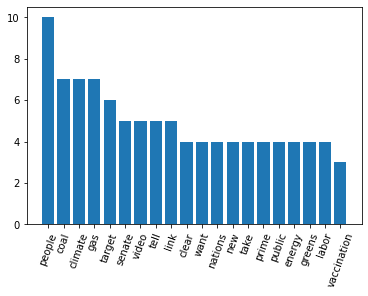

In [17]:
plt.bar(range(len(x_bandt)), y_bandt, align='center')
plt.xticks(range(len(x_bandt)), x_bandt)
plt.xticks(rotation=70)
plt.show()

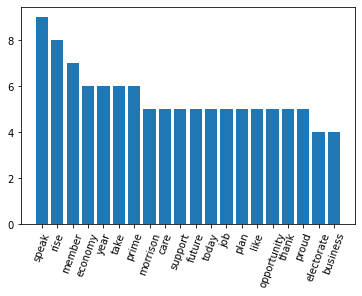

In [18]:
plt.bar(range(len(x_allen)), y_allen, align='center')
plt.xticks(range(len(x_allen)), x_allen)
plt.xticks(rotation=70)
plt.show()

<div class="alert alert-block alert-success">
<b>Try it Yourself:</b> 
    
The graphs above show the top 20 words spoken by each politician in the snippets. Try changing this to the top 10 words or the top 30.
</div>

## Bonus Material: How Many Documents?

A word may appear many times in the document collection because it's mentioned all throughout the collection or perhaps because it's mentioned many times in the the one document.

In the following code we uncover the extent of spread of these top words over the document collection.  

In [19]:
# Let's see if these words are talked about throughout the collection of snippets retrieved in OpenAustralia

# Save the documents (which are actually webpages) in a list
# These correspond to bandt_snippets and allen_snippets, 
# i.e. bandt_docs[n] specifies the website for the speech bandt_snippets[n]
bandt_docs = [snippet['gid'] for snippet in hansard_bandt['rows'] if 'body' in snippet]
allen_docs = [snippet['gid'] for snippet in hansard_allen['rows'] if 'body' in snippet]

# We have an issue: we don't have a set of normalised documents according to their snippets
# That is, bandt_snippets and allen_snippets are the raw texts
# Let's clean the documents again, but this time we will keep the snippets separate, and we won't
# save them as one big collection, like we did for tokens_bandt and tokens_allen. These are a list of 
# tokens in the whole document collection.

# Let's start by defining a function that normalises the text in the snippets 
def normalise_text(text):
    # These are already defined outside of this function and we are using them inside our function
    # nlp = spacy.load("en_core_web_sm")
    # omit_pos = ['PUNCT', 'SYM', 'NUM', 'X']
    # omit_words = ['australia', 'australian', 'australians', 'minister', 'bill', 'government']
    out = list()
    for token in nlp(text):
        if not token.is_stop and token.pos_ not in omit_pos:
            out.append(token.lemma_.lower())
    return out

# The variables x_bandt and x_allen hold the top 20 words spoken by each individual
# Let's save the results in bandt_words_in_docs and allen_words_in_docs
bandt_words_in_docs = list()
allen_words_in_docs = list()

for word in x_bandt:
    my_count = 0
    for n in range(len(bandt_snippets)):
        if word in normalise_text(bandt_snippets[n]):
            my_count += 1
    bandt_words_in_docs.append((word, my_count))


for word in x_allen:
    my_count = 0
    for n in range(len(allen_snippets)):
        if word in normalise_text(allen_snippets[n]):
            my_count += 1
    allen_words_in_docs.append((word, my_count))

In [22]:

average_bandt = [(count_bandt[c][0],count_bandt[c][1]/bandt_words_in_docs[c][1]) for c in range(20)]    
average_allen = [(count_allen[c][0],count_allen[c][1]/allen_words_in_docs[c][1]) for c in range(20)]

In [21]:
y_docs = [value[1] for value in bandt_words_in_docs[:20]]
y_avg = [value[1] for value in average_bandt[:20]]
 
plt.bar(x_bandt, y_docs, 0.4, label = 'docs')
plt.bar(x_bandt, y_avg, 0.4, label = 'avg')
  
plt.xticks(range(len(x_bandt)), x_bandt)
plt.xticks(rotation=70)
plt.xlabel("Words")
plt.ylabel("Num Docs / Avg Count")
plt.title("Average Word Count per Document")
plt.legend()
plt.show()

NameError: name 'x_axis' is not defined

In [ ]:
y_docs = [value[1] for value in allen_words_in_docs[:20]]
y_avg = [value[1] for value in average_allen[:20]]
 
plt.bar(x_allen, y_docs, 0.4, label = 'docs')
plt.bar(x_allen, y_avg, 0.4, label = 'avg')
  
plt.xticks(range(len(x_allen)), x_allen)
plt.xticks(rotation=70)
plt.xlabel("Words")
plt.ylabel("Num Docs / Avg Count")
plt.title("Average Word Count per Document")
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>You Can Extend this Notebook</b> 

<ul>


<li>This notebook only examined the snippets from 2 particular politicians. You can try rerunning the code using different politicians. </li>
<li>Rather than analysing only speech snippet, you can get the whole speech by learning how to scrape webpages with this related notebook: https://github.com/Australian-Text-Analytics-Platform/web-scraping</li>
</ul>

</div>